In [165]:
import os
import re
import numpy as np
import pandas as pd
import nltk
from collections import Counter
from scipy.cluster.hierarchy import dendrogram
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.probability import FreqDist
# Modules from scikit-learn
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
# Packages for plotting
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white', font_scale=1.3) # Set the style for the plots

In [2]:
import nltk  
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cdbrown0702/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/cdbrown0702/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [177]:
fake = pd.read_csv("Dataset/Fake.csv")
true = pd.read_csv("Dataset/True.csv")
true = true[0:150]
fake = fake[0:150]

In [4]:
## Looping through and adding every text to a string for True
trueCorpus = []
fakeCorpus = []
for i in true['text']:
    trueCorpus.append(i) 

for i in fake['text']:
    fakeCorpus.append(i) 

In [109]:
## Tokenizing texts with NLTK
tokenized_True = [word_tokenize(i) for i in trueCorpus]
#tokenized_Fake = [word_tokenize(i) for i in fakeCorpus]

KeyboardInterrupt: 

In [ ]:
print("trueCorpus Length: "+ str(len(tokenized_True)))
print("fakeCorpus Length: "+ str(len(tokenized_Fake)))

In [7]:
## Removing Stopwords from the Corpus
stop_words = set(stopwords.words('english'))
filteredTrue = []
filteredFake = []

for wordList in tokenized_True:
    for word in wordList:
        if word not in stop_words:
            filteredTrue.append(word)

for word in tokenized_True:
    for word in wordList:
        if word not in stop_words:
            filteredFake.append(word)

In [11]:
##Removing Punctuation 

tempTrue  = ' '.join([str(elem) for elem in filteredTrue])
tokenizer = nltk.RegexpTokenizer(r"\w+")
filteredTrue = tokenizer.tokenize(tempTrue)


tempFalse  = ' '.join([str(elem) for elem in filteredFake])
tokenizer = nltk.RegexpTokenizer(r"\w+")
filteredFake = tokenizer.tokenize(tempFalse)

In [178]:
# intentions | effect of the article
intents = ['true', 'fake']

# Initialize necessary counters for total words, document freqency, and counts by intention
all_counts = Counter()
doc_counts = Counter()
intent_counts = {intent: Counter() for intent in intents}

# Initializes necessary data strux
art_data = []
art_intents = []

# used for article iteration
count = 0

# iterate through true articles
for index,row in true.iterrows():
    art_counter = Counter()
    
    # define article-level structures
    art_data.append({
        "title": row['title'],
        "text": row['text'],
        "subject": row['subject'],
        "date": row['date'],
        "counts": art_counter,
        "intent": intents[0]
    })
    art_intents.append(intents[0])
    
    # tokenizes each article, removing stop words and punctuation
    filtTokens = []
    
    tokens = [word_tokenize(x) for x in true.iloc[count]['text'].split()]
    for wordList in tokens:
        for word in wordList:
            if word not in stop_words:
                filtTokens.append(word)
    tempTokens = ' '.join([str(elem) for elem in filtTokens])
    filtTokens = tokenizer.tokenize(tempTokens)

    # synthesizes article-level observations into counters
    art_counter.update(filtTokens)
    intent_counts['true'].update(art_counter)
    doc_counts.update(art_counter.keys())
    all_counts += art_counter
    
    count += 1
    
# resets for fake articles
count = 0

# iterate through fake articles
for index,row in fake.iterrows():
    art_counter = Counter()
    
    # define article-level structures
    art_data.append({
        "title": row['title'],
        "text": row['text'],
        "subject": row['subject'],
        "date": row['date'],
        "counts": art_counter,
        "intent": intents[1]
    })
    art_intents.append(intents[1])
    
    # tokenizes each article, removing stop words and punctuation
    filtTokens = []
    
    tokens = [word_tokenize(x) for x in fake.iloc[count]['text'].split()]
    for wordList in tokens:
        for word in wordList:
            if word not in stop_words:
                filtTokens.append(word)
    tempTokens = ' '.join([str(elem) for elem in filtTokens])
    filtTokens = tokenizer.tokenize(tempTokens)

    # synthesizes article-level observations into counters
    art_counter.update(filtTokens)
    intent_counts['fake'].update(art_counter)
    doc_counts.update(art_counter.keys())
    all_counts += art_counter
    
    count += 1

In [179]:
vocabulary = []
for wtype, doc in doc_counts.most_common():
    if doc > 1:
        vocabulary.append(wtype)

In [180]:
def build_vectors(vocabulary):
    vectors = []
    for s in art_data:
        counts = s['counts']
        v = np.array([counts[x] for x in vocabulary])
        vectors.append(v)
    return vectors

In [181]:
article_vectors = build_vectors(vocabulary)

In [182]:
def plot_articles(vectors):
    svd_model = TruncatedSVD(n_components = 2)
    vectors_2d = svd_model.fit_transform(vectors)
    
    plt.figure(figsize=(20,20))
    _ = sns.scatterplot(x=vectors_2d[:, 0], y=vectors_2d[:, 1], hue=art_intents,
                        s=100, alpha=.75)
    _ = plt.legend(loc="center left", bbox_to_anchor=(1.05, .5),borderaxespad=0)
    _ = plt.xticks([])
    _ = plt.yticks([])

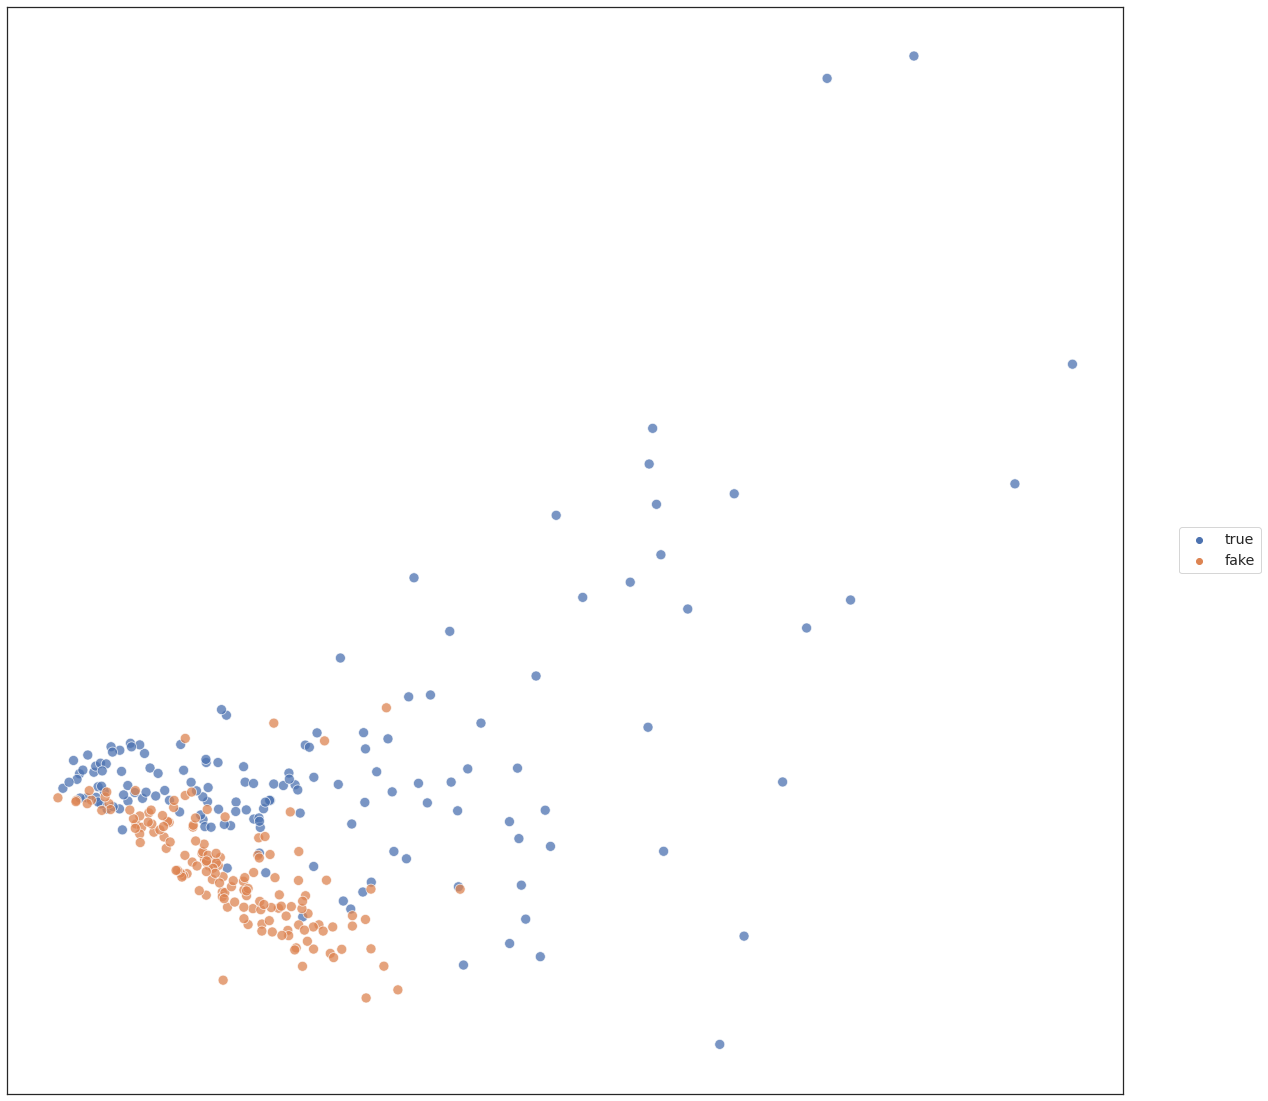

In [183]:
plot_articles(article_vectors)